In [1]:
folder = 'LASSENA_PENUMBRA/'
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
import LASSENA_Readout as LAS
data, dark, OnCheck, Myst = LAS.get_data_loc(folder)

37
16
14
14
13
14
15
5


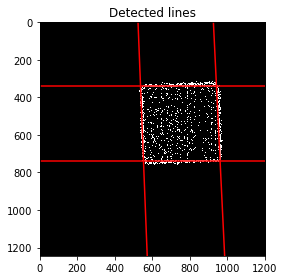

In [2]:
dark_image = LAS.avg_bunch(dark[0])
_,best_params,_ = LAS.main()
#need to do ROI for each set of images

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(126.0, 109.0)

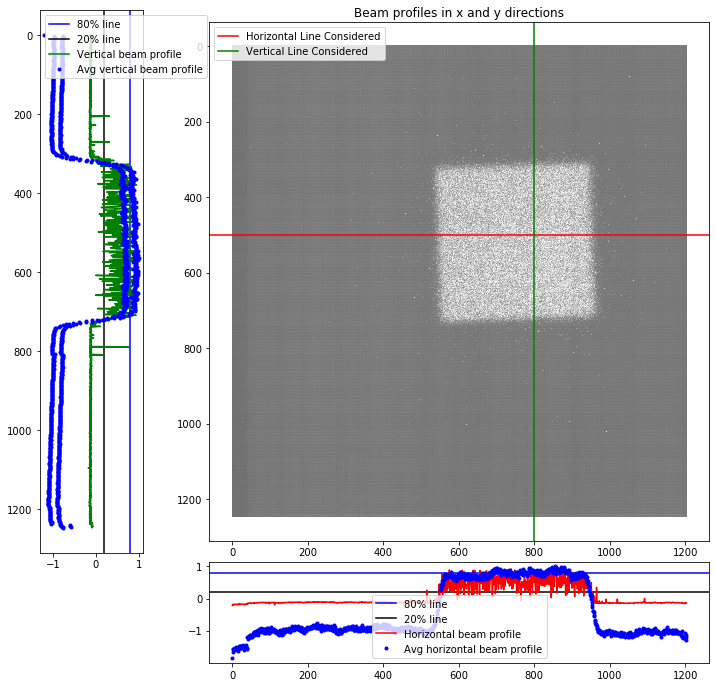

In [34]:
#need to average dataset to create average image
#need to use get_image_dose
avg_im_for_collim = [LAS.dark_remov(dat,dark_image).mean(axis=0) for dat in data]

#this is the three 10mm,5mm and 2mm collimators
avg_im_doses = [LAS.get_image_dose(avg_img,dark_image,best_params) for avg_img in avg_im_for_collim]
avg_im_doses.pop(-1)
def plot_penumbra(avg_img,x_line=500,y_line=800,line_eighty=0.8,line_twen=0.2):
    fig = plt.figure(figsize=(12,12))
    grid = plt.GridSpec(12,12)
    main_ax = fig.add_subplot(grid[:-2,3:15])
    main_ax.set_title('Beam profiles in x and y directions')
    y_graph = fig.add_subplot(grid[:-2,:2],sharey=main_ax)
    x_graph = fig.add_subplot(grid[-2:,3:12],sharex=main_ax)
    y_graph.axvline(line_eighty,color='b',label='80% line')
    y_graph.axvline(line_twen,color='k',label='20% line')
    x_graph.axhline(line_eighty,color='b',label='80% line')
    x_graph.axhline(line_twen,color='k',label='20% line')
    main_ax.axhline(x_line,color='r',label='Horizontal Line Considered')
    main_ax.axvline(y_line,color='g',label='Vertical Line Considered')
    x_avg_norm = avg_img.mean(axis=0)/np.max(avg_img.mean(axis=0))
    y_avg_norm = avg_img.mean(axis=1)/np.max(avg_img.mean(axis=1))
    normalised_image = avg_img/np.max(avg_img)
    y_graph.invert_yaxis()
    #this might have ballache being a list - array may be better
    #normalising the image to get rid of dose dependence
    main_ax.imshow(normalised_image,cmap='gray')
    y_graph.plot(normalised_image[:,y_line],[i for i in range(len(normalised_image[:,y_line]))],'g',label='Vertical beam profile')
    y_graph.plot(y_avg_norm,[i for i in range(len(y_avg_norm))],'b.',label='Avg vertical beam profile')
    x_graph.plot(normalised_image[x_line,:],'r',label='Horizontal beam profile')
    x_graph.plot(x_avg_norm,'b.',label='Avg horizontal beam profile')
    p_y = len([1 for point in y_avg_norm if 0.2<point<0.8])/2
    p_x = len([1 for point in x_avg_norm if 0.2<point<0.8])/2
    main_ax.legend()
    x_graph.legend()
    y_graph.legend()
    return p_x,p_y
plot_penumbra(avg_im_doses[0])